# Uber Switchback Expirement Analysis

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(2025)

# 1. Load the data
data = pd.read_excel("UberData.xlsx", sheet_name="Switchbacks")

# Convert logicals to categorical factors
data['treat'] = data['treat'].astype('bool')   # False = 2 mins, True = 5 mins
data['commute'] = data['commute'].astype('bool')  # commute vs non-commute (rush hour vs. not rush hour)

# 2. Define outcome variables
outcomes = ["trips_pool", "trips_express", "rider_cancellations",
            "total_driver_payout", "total_matches", "total_double_matches"]



## 1.  Run first set of t-tests: Treatment (5 min) vs. Control (2 min)

In [30]:
for var in outcomes:
    print(f"\n--- T-test for {var} ---")
    group1 = data.loc[data['treat'] == True, var]
    group2 = data.loc[data['treat'] == False, var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")




--- T-test for trips_pool ---
T-statistic: 2.3335, P-value: 0.0213

--- T-test for trips_express ---
T-statistic: -2.2015, P-value: 0.0296

--- T-test for rider_cancellations ---
T-statistic: 2.7640, P-value: 0.0066

--- T-test for total_driver_payout ---
T-statistic: -2.2037, P-value: 0.0294

--- T-test for total_matches ---
T-statistic: -1.8169, P-value: 0.0717

--- T-test for total_double_matches ---
T-statistic: 1.1319, P-value: 0.2599


## 2. Run second set of t-tests for commute vs. not-commute (rush hour vs. not-rush hour)

In [31]:
for var in outcomes:
    print(f"\n--- T-test for {var} ---")
    group1 = data.loc[data['commute'] == True, var]
    group2 = data.loc[data['commute'] == False, var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")




--- T-test for trips_pool ---
T-statistic: 2.3312, P-value: 0.0276

--- T-test for trips_express ---
T-statistic: 8.7257, P-value: 0.0000

--- T-test for rider_cancellations ---
T-statistic: 10.5151, P-value: 0.0000

--- T-test for total_driver_payout ---
T-statistic: 9.1694, P-value: 0.0000

--- T-test for total_matches ---
T-statistic: 9.6542, P-value: 0.0000

--- T-test for total_double_matches ---
T-statistic: 6.3937, P-value: 0.0000


## 3. Run t-tests to find the treatment effects within commute vs. not-commute (rush hour vs. not rush hour)

In [32]:
for var in outcomes:
    # Commute only
    print(f"\n--- Commute Only: {var} ---")
    commute_data = data[data['commute'] == True]
    t_stat, p_val = stats.ttest_ind(commute_data.loc[commute_data['treat'] == True, var],
                                    commute_data.loc[commute_data['treat'] == False, var],
                                    equal_var=False)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

    # Non-Commute only
    print(f"\n--- Non-Commute Only: {var} ---")
    non_commute_data = data[data['commute'] == False]
    t_stat, p_val = stats.ttest_ind(non_commute_data.loc[non_commute_data['treat'] == True, var],
                                    non_commute_data.loc[non_commute_data['treat'] == False, var],
                                    equal_var=False)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")



--- Commute Only: trips_pool ---
T-statistic: 0.1839, P-value: 0.8565

--- Non-Commute Only: trips_pool ---
T-statistic: 2.5242, P-value: 0.0131

--- Commute Only: trips_express ---
T-statistic: -1.6153, P-value: 0.1239

--- Non-Commute Only: trips_express ---
T-statistic: -2.8971, P-value: 0.0046

--- Commute Only: rider_cancellations ---
T-statistic: 3.1953, P-value: 0.0068

--- Non-Commute Only: rider_cancellations ---
T-statistic: 4.2183, P-value: 0.0001

--- Commute Only: total_driver_payout ---
T-statistic: -1.6806, P-value: 0.1105

--- Non-Commute Only: total_driver_payout ---
T-statistic: -2.9716, P-value: 0.0037

--- Commute Only: total_matches ---
T-statistic: -1.2147, P-value: 0.2402

--- Non-Commute Only: total_matches ---
T-statistic: -2.8247, P-value: 0.0057

--- Commute Only: total_double_matches ---
T-statistic: 0.0770, P-value: 0.9394

--- Non-Commute Only: total_double_matches ---
T-statistic: 1.6192, P-value: 0.1086


## 4. Create a graphical representation of the results

/var/folders/xt/8w_6k8m945g2tjrzls6q21mm0000gn/T/ipykernel_17256/922916858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


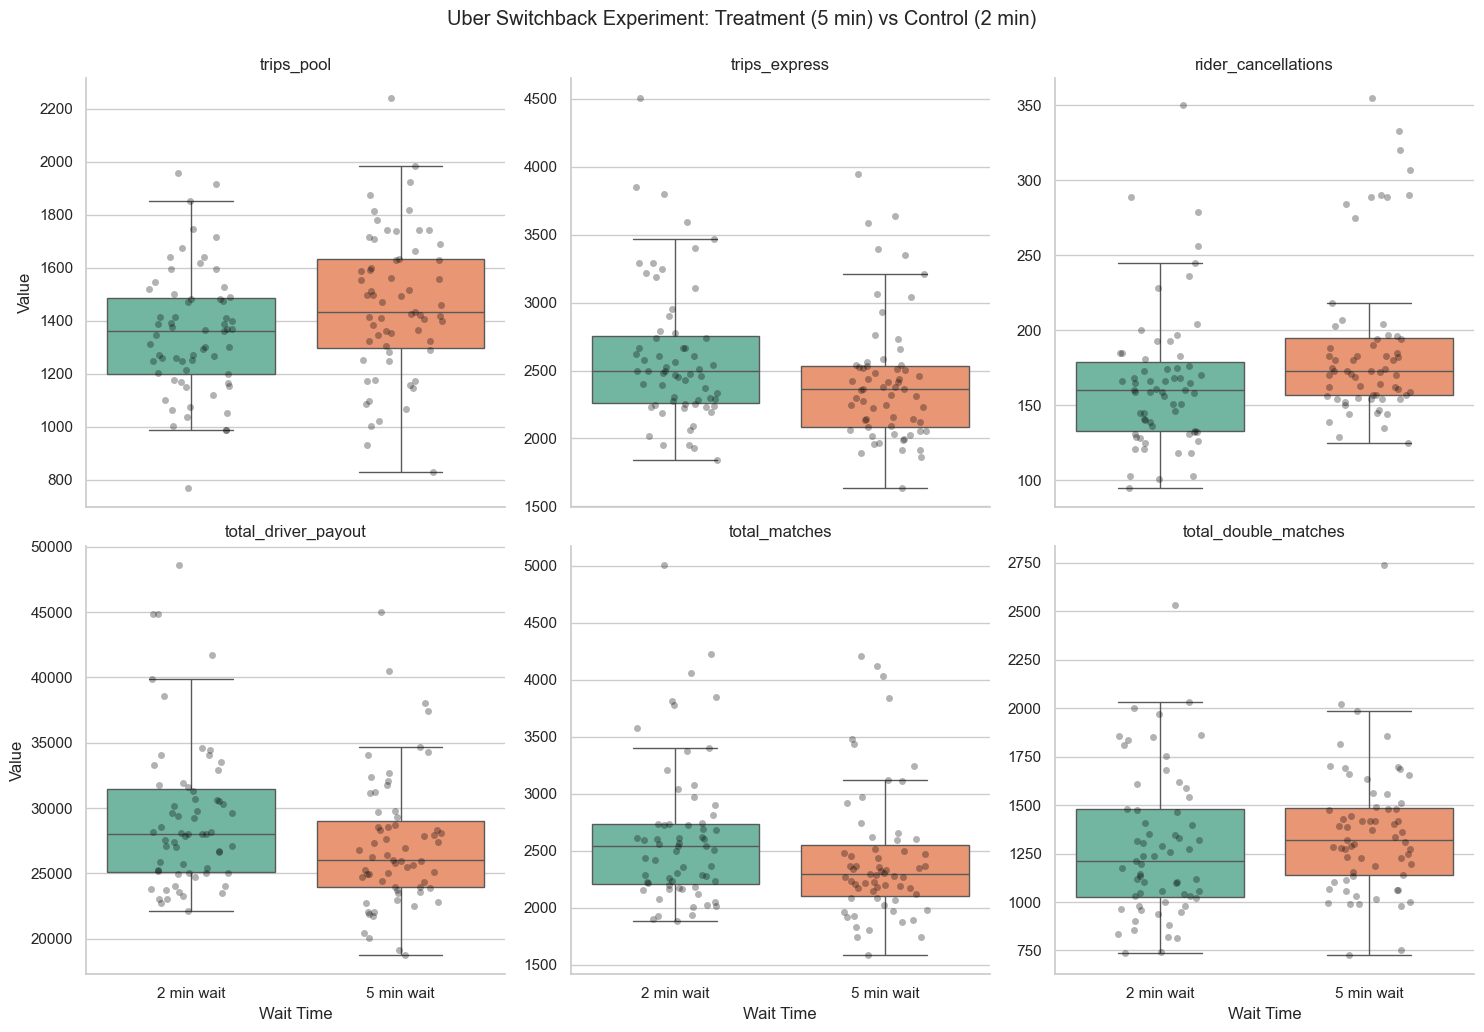

In [33]:
# Convert labels
plot_data = data.copy()
plot_data['treat'] = plot_data['treat'].map({True: "5 min wait", False: "2 min wait"})
plot_data['commute'] = plot_data['commute'].map({True: "Commute", False: "Non-Commute"})

# Melt data for plotting
plot_data_long = plot_data.melt(id_vars=['treat', 'commute'], value_vars=outcomes,
                                var_name='metric', value_name='value')

# Boxplots: treatment vs control
sns.set(style="whitegrid")
g = sns.catplot(
    data=plot_data_long,
    x="treat",
    y="value",
    col="metric",
    kind="box",
    col_wrap=3,
    sharey=False,
    palette="Set2",
    showfliers=False
)
# Add jittered points
for ax in g.axes.flatten():
    metric = ax.get_title().split(' = ')[1]
    sns.stripplot(
        data=plot_data_long[plot_data_long['metric'] == metric],
        x="treat", y="value", color='black', alpha=0.3, ax=ax, jitter=0.2
    )

g.set_axis_labels("Wait Time", "Value")
g.set_titles("{col_name}")
g.fig.suptitle("Uber Switchback Experiment: Treatment (5 min) vs Control (2 min)", y=1.03)
plt.show()